# Nonlinear Relationships

In [240]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
% matplotlib inline
import pandas as pd

In [241]:
df =pd.read_csv('../housing.data',delim_whitespace=True,header=None)


In [242]:
col_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.columns = col_names
X = df.loc[:,df.columns.isin(['LSTAT'])]
y = df['MEDV'].values

In [179]:
X

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33
5,5.21
6,12.43
7,19.15
8,29.93
9,17.10


## Brief Introduction to Decision Tree

In [180]:
from sklearn.tree import DecisionTreeRegressor

In [181]:
tree = DecisionTreeRegressor(max_depth=5)

In [182]:
tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [183]:
points = X.values.flatten().argsort()

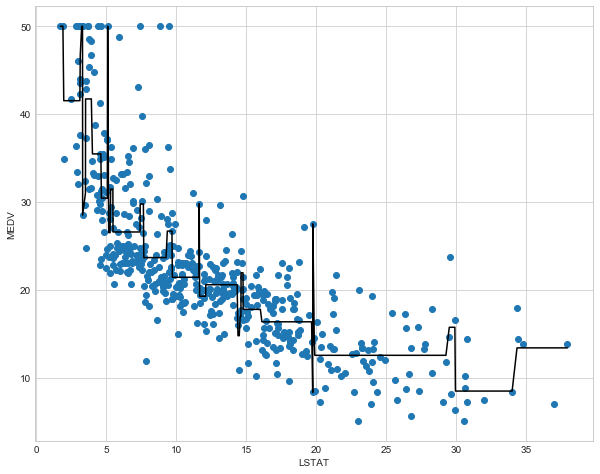

In [184]:
plt.figure(figsize=(10,8))
plt.scatter(X.values[points], y[points])
plt.plot(X.values[points], tree.predict(X.values[points]), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV');

***

Using `max_depth` of 5 led to overfitting. Let's try 2 instead.

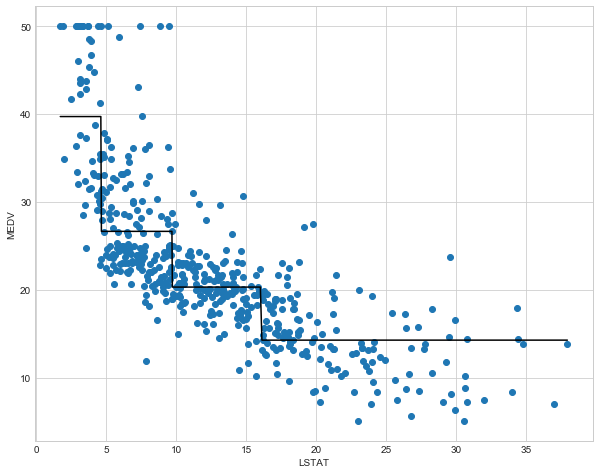

In [185]:
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X, y)
sort_idx = X.values.flatten().argsort()
plt.figure(figsize=(10,8))
plt.scatter(X.values[sort_idx], y[sort_idx])
plt.plot(X.values[sort_idx], tree.predict(X.values[sort_idx]), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV');

# Brief Introduction to Random Forest

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [187]:
X = df.loc[:,df.columns.isin(['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])]
#y = df['MEDV'].values

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [189]:
from sklearn.ensemble import RandomForestRegressor

In [190]:
forest = RandomForestRegressor(n_estimators=500, criterion='mse', 
                               random_state=42, n_jobs=-1)

In [191]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [192]:
y_train_pred = forest.predict(X_train)

In [193]:
y_test_pred = forest.predict(X_test)

In [194]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 1.8700, test: 9.3921


In [195]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.9787, test: 0.8740


# Brief Introduction to AdaBoost

In [196]:
from sklearn.ensemble import AdaBoostRegressor

In [197]:
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), 
                        n_estimators=500, random_state=42)

In [198]:
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=500,
         random_state=42)

In [199]:
y_train_pred = ada.predict(X_train)

In [200]:
y_test_pred = ada.predict(X_test)

In [201]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 4.6605, test: 13.4949


In [202]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.9470, test: 0.8189


***

# Revisiting Feature Importance

In [232]:
ada.feature_importances_

array([0.03104826, 0.00243815, 0.01083651, 0.00085548, 0.0371141 ,
       0.23589575, 0.00958776, 0.13743614, 0.01893706, 0.02188852,
       0.04185043, 0.02193283, 0.43017901])

In [234]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [236]:
result = pd.DataFrame(ada.feature_importances_, X.columns)
result.columns = ['feature']

In [237]:
result.sort_values(by='feature', ascending=False)

,feature
LSTAT,0.430179
RM,0.235896
DIS,0.137436
PTRATIO,0.041850
NOX,0.037114
CRIM,0.031048
B,0.021933
TAX,0.021889
RAD,0.018937
INDUS,0.010837


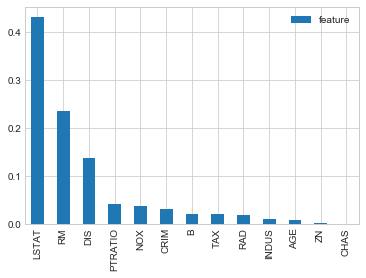

In [238]:
result.sort_values(by='feature', ascending=False).plot(kind='bar');

# Trying Decision tree on every feature  : unscaled



In [222]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [223]:
print(f"RMSE of the train set:{mean_squared_error(y_train,y_train_pred)}")
print(f"R2 SCORE of the train set:{r2_score(y_train,y_train_pred)}")
print(f"RMSE of the test set:{mean_squared_error(y_test,y_test_pred)}")
print(f"R2 SCORE of the test set:{r2_score(y_test,y_test_pred)}")

RMSE of the train set:15.367966101816164
R2 SCORE of the train set:0.8251584424966963
RMSE of the test set:19.107306539548826
R2 SCORE of the test set:0.7435711616336519


# Trying Decision tree on every feature : robust scaled (gives better results)

In [224]:
from sklearn.preprocessing import RobustScaler, StandardScaler


In [225]:
scaler = RobustScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train_std, y_train)
y_train_pred = tree.predict(X_train_std)
y_test_pred = tree.predict(X_test_std)

In [226]:
print(f"RMSE of the train set:{mean_squared_error(y_train,y_train_pred)}")
print(f"R2 SCORE of the train set:{r2_score(y_train,y_train_pred)}")
print(f"RMSE of the test set:{mean_squared_error(y_test,y_test_pred)}")
print(f"R2 SCORE of the test set:{r2_score(y_test,y_test_pred)}")

RMSE of the train set:15.367966101816167
R2 SCORE of the train set:0.8251584424966962
RMSE of the test set:16.92824407559127
R2 SCORE of the test set:0.7728151817263731


# Trying Decision tree on every feature : Power transformer (also normalizes) : same score as robust scaler

In [230]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train_std, y_train)
y_train_pred = tree.predict(X_train_std)
y_test_pred = tree.predict(X_test_std)

print(f"RMSE of the train set:{mean_squared_error(y_train,y_train_pred)}")
print(f"R2 SCORE of the train set:{r2_score(y_train,y_train_pred)}")
print(f"RMSE of the test set:{mean_squared_error(y_test,y_test_pred)}")
print(f"R2 SCORE of the test set:{r2_score(y_test,y_test_pred)}")


RMSE of the train set:15.367966101816167
R2 SCORE of the train set:0.8251584424966962
RMSE of the test set:16.928244075591266
R2 SCORE of the test set:0.7728151817263731


C:\Users\Marianne\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:2778: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


# Trying Decision tree on every feature : standard scale

In [227]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train_std, y_train)
y_train_pred = tree.predict(X_train_std)
y_test_pred = tree.predict(X_test_std)
print(f"RMSE of the train set:{mean_squared_error(y_train,y_train_pred)}")
print(f"R2 SCORE of the train set:{r2_score(y_train,y_train_pred)}")
print(f"RMSE of the test set:{mean_squared_error(y_test,y_test_pred)}")
print(f"R2 SCORE of the test set:{r2_score(y_test,y_test_pred)}")


RMSE of the train set:15.367966101816167
R2 SCORE of the train set:0.8251584424966962
RMSE of the test set:19.107306539548826
R2 SCORE of the test set:0.7435711616336519


C:\Users\Marianne\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Marianne\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Marianne\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


# Plotting the validation curve

In [308]:
X = df.loc[:,df.columns.isin(['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])]
y = df['MEDV'].values

from sklearn.linear_model import Ridge
np.random.seed(0)
param_name = "alpha"
param_range = np.logspace(-5, 2, 10)
np.random.seed(0)
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X_cv, y_cv = X.values[indices], y[indices]

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(Ridge(), 
                                             X_cv, 
                                             y_cv, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             n_jobs=-1)
print(train_scores)
print(test_scores)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

C:\Users\Marianne\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[[0.74882071 0.66116976 0.875403  ]
 [0.74882071 0.66116976 0.875403  ]
 [0.74882071 0.66116975 0.875403  ]
 [0.74882056 0.66116963 0.87540298]
 [0.74881551 0.66116535 0.8754022 ]
 [0.74866437 0.66102736 0.87537881]
 [0.74636254 0.65819569 0.87501562]
 [0.73911847 0.64279159 0.87353395]
 [0.73338701 0.62612971 0.86362406]
 [0.72337228 0.61533948 0.78968411]]
[[ 0.58391109  0.53248501 -5.86891506]
 [ 0.58392501  0.53248763 -5.86854902]
 [ 0.5840084   0.53250337 -5.86635601]
 [ 0.58450574  0.53259745 -5.85325762]
 [ 0.58739853  0.53315183 -5.77643428]
 [ 0.60199461  0.53616007 -5.36976126]
 [ 0.6405647   0.54697716 -4.00220828]
 [ 0.65760611  0.55726113 -2.33909285]
 [ 0.65217515  0.54360069 -1.02744694]
 [ 0.62613321  0.47038977  0.12814003]]


In [ ]:
plt.figure(figsize=(10,8))
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter alpha')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1.0])
plt.show()

In [340]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(10, 8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

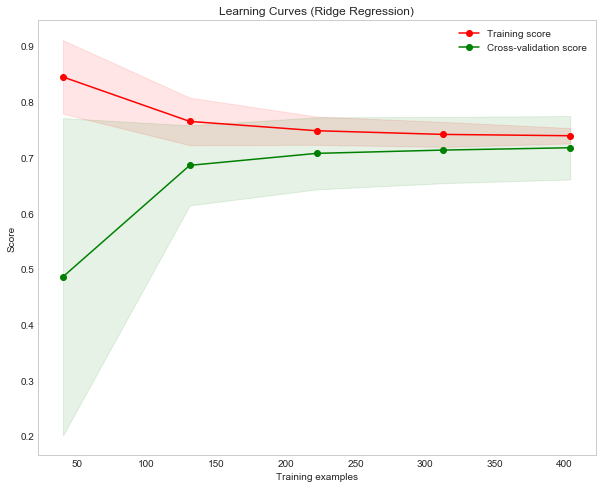

In [341]:
title = "Learning Curves (Ridge Regression)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = Ridge()
plot_learning_curve(estimator, title, X_cv, y_cv, cv=cv, n_jobs=4)
plt.show()

In [345]:
from sklearn.ensemble import RandomForestRegressor
param_name = "n_estimators"
param_range = np.arange(1, 250, 2)
np.random.seed(0)
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X_std = pd.DataFrame(scaler.fit_transform(X))
X_std.columns = X.columns
X_cv, y_cv = X_std.values[indices], y[indices]

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestRegressor(), 
                                             X_cv, 
                                             y_cv, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             n_jobs=-1)
print(train_scores)
print(test_scores)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

C:\Users\Marianne\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[[0.92708259 0.8236051  0.89932617]
 [0.94439283 0.94456901 0.94252846]
 [0.96610242 0.94521579 0.96189461]
 [0.97111414 0.96460445 0.96269149]
 [0.97185666 0.97083632 0.97027509]
 [0.97799988 0.96929994 0.96970072]
 [0.97153545 0.97667507 0.97406164]
 [0.97386815 0.97568552 0.97363917]
 [0.97495264 0.97883397 0.97534814]
 [0.981393   0.98217813 0.97561598]
 [0.98252039 0.97241491 0.97450052]
 [0.98295037 0.97972995 0.97641392]
 [0.9792643  0.97741523 0.97674961]
 [0.98267456 0.97858205 0.97680119]
 [0.98210373 0.97464356 0.97389342]
 [0.97864482 0.98246738 0.97275805]
 [0.9801889  0.98202386 0.97842118]
 [0.98004532 0.98040757 0.97531647]
 [0.98015139 0.98092828 0.9728823 ]
 [0.98041399 0.97984897 0.97921115]
 [0.98007989 0.98082059 0.97929835]
 [0.9805029  0.98088575 0.97947767]
 [0.97962001 0.98356808 0.97735755]
 [0.97921486 0.98306688 0.97415315]
 [0.98423213 0.98263089 0.97778237]
 [0.98171849 0.98222019 0.97987772]
 [0.98210179 0.98009841 0.97938465]
 [0.98420638 0.98192376 0.97

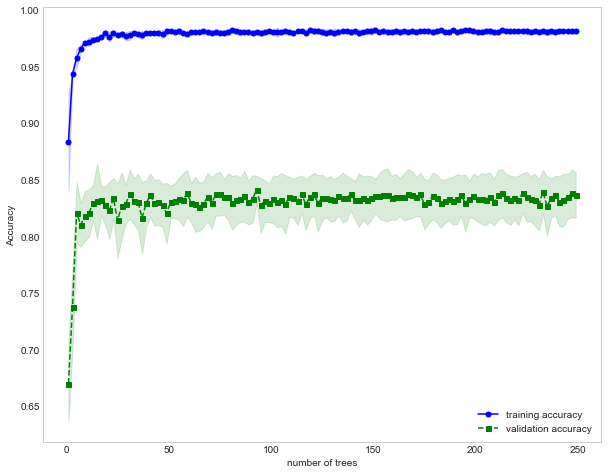

In [346]:
plt.figure(figsize=(10,8))
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('number of trees')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1.0])
plt.show()

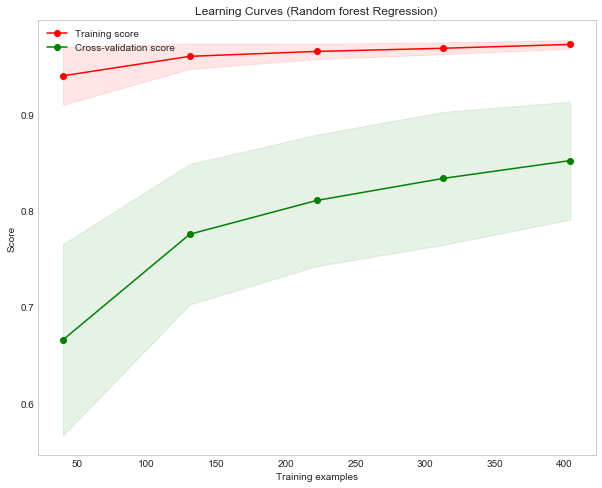

In [360]:
title = "Learning Curves (Random forest Regression)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = RandomForestRegressor()
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()

In [349]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_std, y)
rf_random.best_params_


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 14.3min finished
C:\Users\Marianne\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 200}

In [ ]:
tree_params = {"max_depth": [10,13,5],
              "n_estimators": [100,200,210,220,230,240,250]}  # Parameters for random forests
# Auxiliary parameters
gs_params = {"cv": 3, "n_jobs": -1, "verbose": 1}


In [ ]:
for i in range(15):

    from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import GridSearchCV

    scores = []
    for name, clf, params in [
                              ("Random forest", RandomForestClassifier(), tree_params),]:
        grid = GridSearchCV(estimator=clf, param_grid=params, **gs_params)
        grid.fit(X_train, y_train)
        scores.append((name, grid.score(X_test, y_test), grid.best_params_))
    
    for name, score, params in scores:
        print("Score {0}: {1:0.2f}\t".format(name, score), params)